# NaN Boxing Benchmarks

In [5]:
# Librairies
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt

In [6]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [7]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [3, 4, 8, 4, 4, 3, 7, 3, 2, 2, 2, 3, 3, 3, 6, 4, 3, 3, 3, 2, 4, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 4, 3, 3, 3, 4, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 4, 2, 3, 2, 4, 3, 2, 2, 4, 3, 3, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 3, 3, 2, 2], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


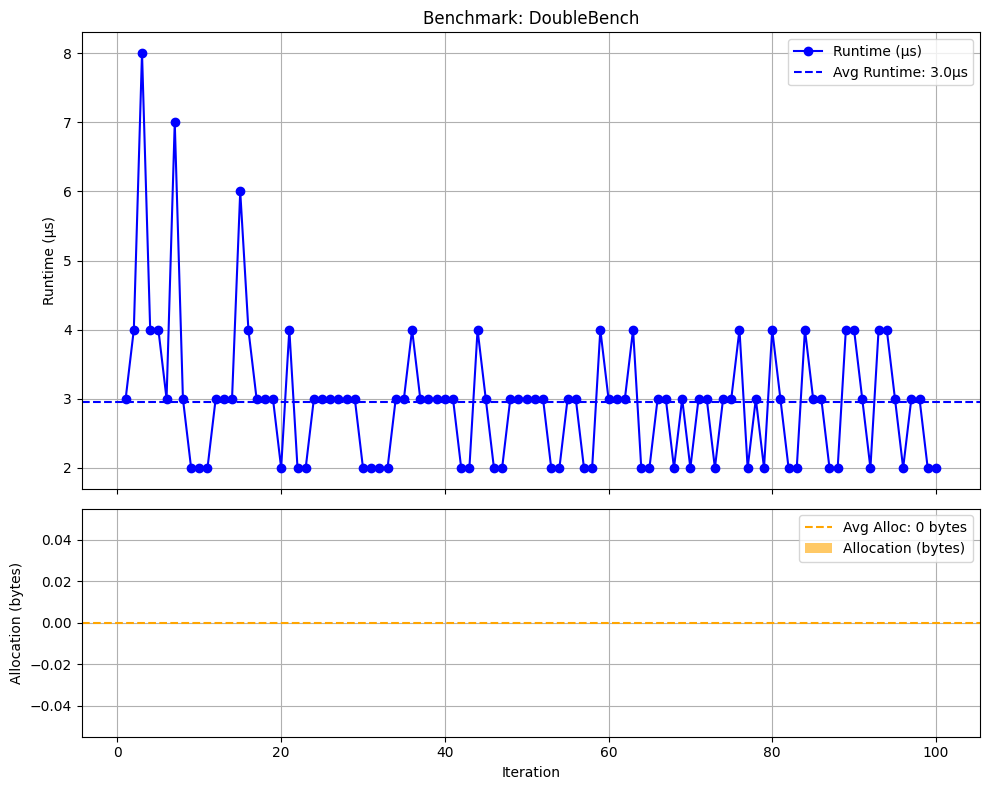

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [9, 6, 6, 5, 6, 6, 6, 6, 7, 8, 8, 7, 6, 6, 9, 8, 7, 6, 6, 7, 6, 5, 5, 6, 8, 8, 8, 7, 6, 6, 6, 6, 5, 8, 6, 7, 6, 8, 6, 6, 6, 8, 8, 8, 19, 8, 6, 6, 5, 6, 6, 5, 8, 8, 7, 8, 6, 7, 5, 6, 6, 5, 5, 5, 9, 8, 8, 6, 6, 15, 5, 6, 8, 8, 8, 7, 6, 6, 6, 6, 6, 8, 8, 8, 7, 6, 6, 5, 6, 6, 5, 7, 8, 7, 8, 6, 6, 6, 6, 8], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


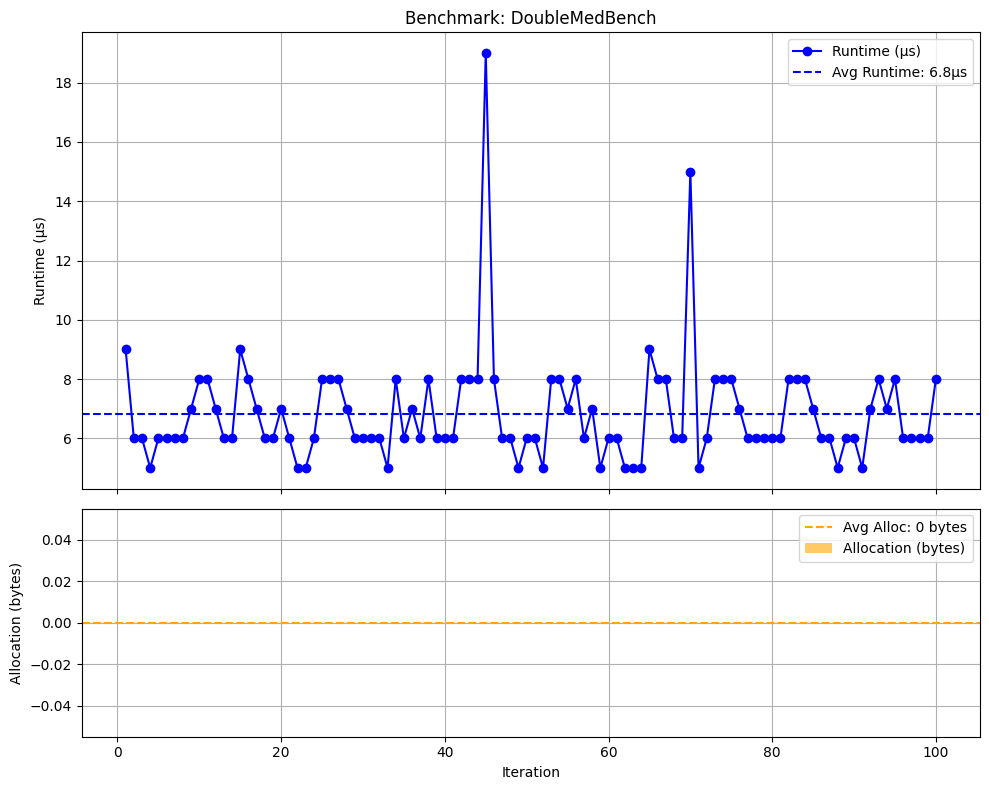

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [9864, 9648, 9341, 9378, 9370, 9647, 9329, 9347, 9300, 9303, 9315, 9293, 9471, 9568, 9469, 9336, 9454, 9373, 9328, 9376, 9362, 9305, 9393, 9347, 9349, 9348, 9360, 9357, 9413, 9334, 9345, 9510, 9286, 9346, 9434, 9365, 9475, 9323, 9326, 9355, 9444, 9256, 9326, 9382, 9284, 9411, 9444, 9356, 9387, 9345, 9447, 9379, 9370, 9797, 9486, 9535, 9347, 9355, 9491, 9299, 9319, 9471, 9398, 9363, 9389, 9378, 9417, 9313, 9322, 9632, 28192, 14715, 9308, 9393, 9372, 9325, 9360, 9331, 9473, 9358, 9416, 9547, 9383, 9424, 9337, 9376, 9344, 9277, 9372, 9343, 9380, 9381, 9436, 9497, 9603, 9531, 9585, 11073, 9564, 9441], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


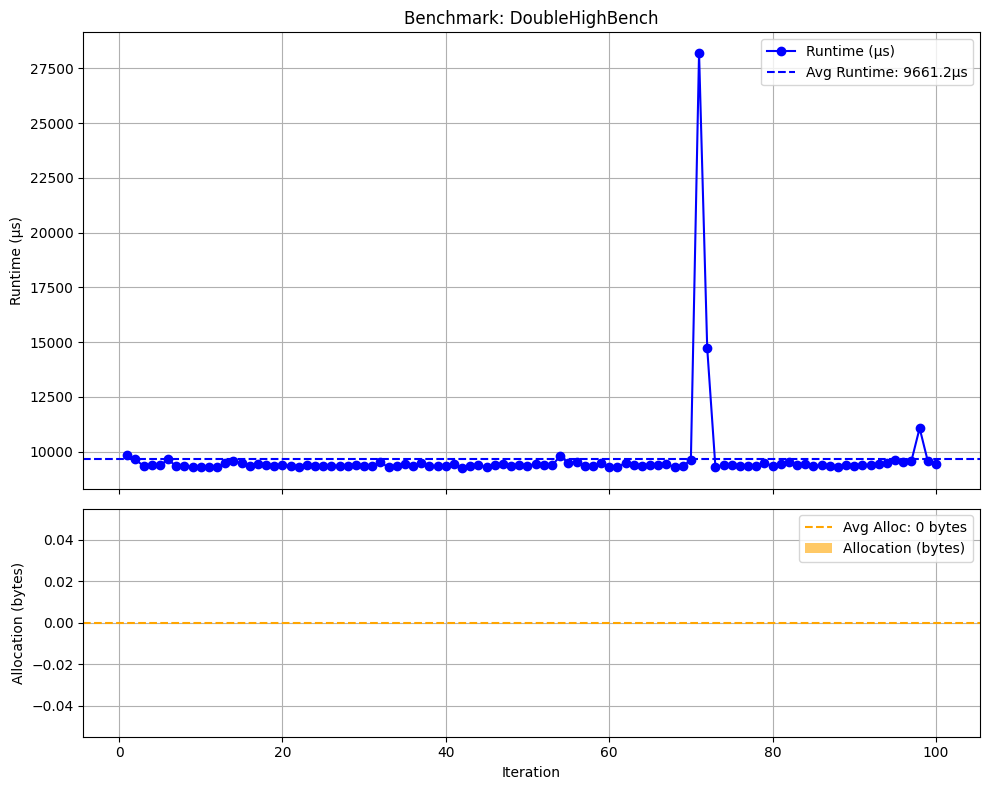

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1075, 1066, 1045, 1161, 1064, 1066, 1127, 1055, 1050, 1083, 1078, 1085, 1064, 1091, 1047, 1097, 1049, 1190, 1051, 1210, 1136, 1237, 1103, 1138, 1047, 1065, 1055, 1169, 1045, 1228, 1064, 1076, 1067, 1044, 1152, 1045, 1113, 1055, 1091, 1045, 1197, 1050, 1167, 1061, 1081, 1057, 1096, 1080, 1060, 1086, 1045, 1078, 1052, 1050, 1061, 1109, 1100, 1050, 1078, 1070, 1127, 1072, 1198, 1057, 1267, 1044, 1113, 1058, 1068, 1087, 1055, 1230, 1062, 1098, 1161, 1061, 1086, 1140, 1055, 1073, 1056, 1067, 1071, 1088, 1085, 1047, 1044, 1079, 1111, 1064, 1058, 1084, 1061, 1067, 1055, 1095, 1101, 1063, 1051, 1070], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


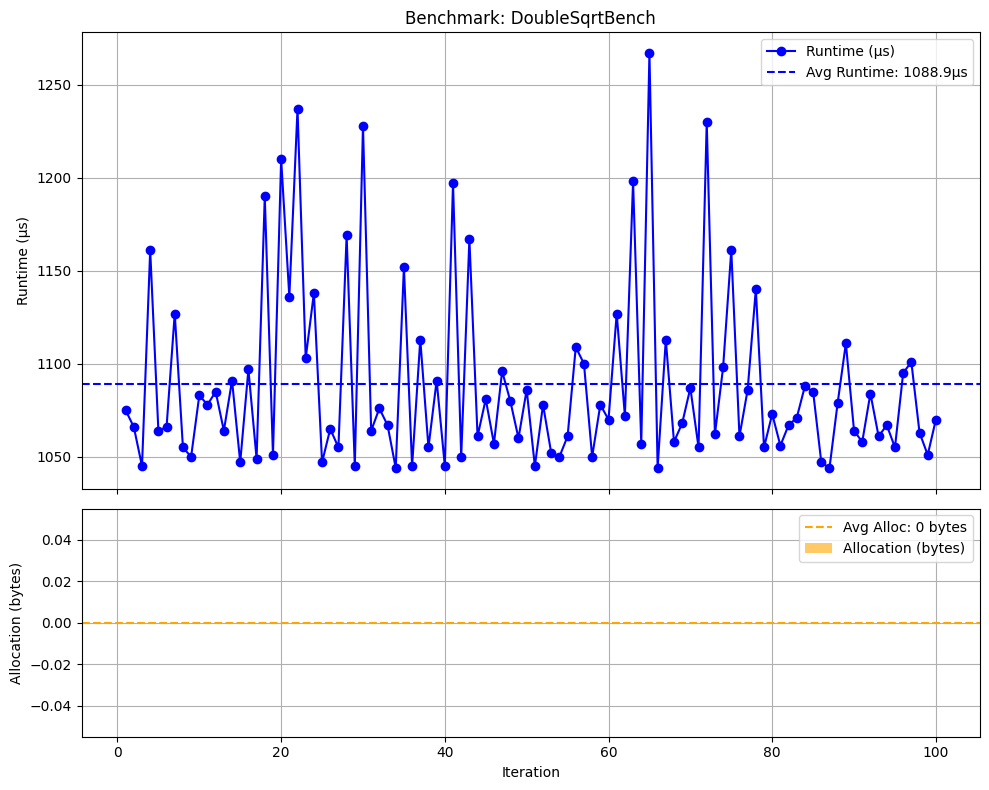

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [35, 26, 25, 29, 31, 27, 25, 24, 24, 24, 30, 30, 31, 25, 26, 25, 24, 35, 25, 31, 30, 35, 30, 26, 25, 24, 24, 24, 41, 31, 41, 26, 26, 24, 24, 31, 30, 30, 30, 25, 25, 25, 32, 25, 25, 26, 25, 24, 24, 24, 25, 24, 25, 26, 24, 29, 29, 24, 24, 26, 25, 28, 31, 24, 24, 31, 30, 25, 24, 25, 24, 33, 26, 26, 24, 31, 27, 29, 25, 31, 26, 24, 29, 28, 30, 25, 26, 29, 24, 24, 31, 24, 26, 28, 25, 26, 24, 25, 25, 28], Allocations: [32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 327

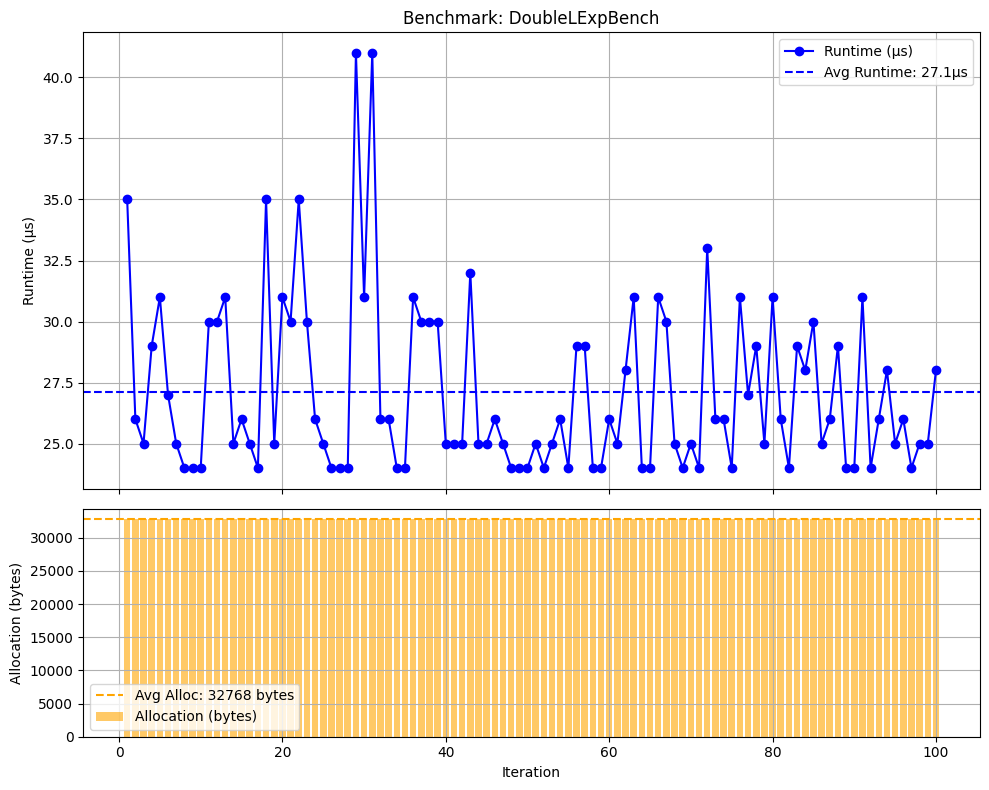

Benchmark: IntegerBench, Runs: 100, Runtimes: [3, 2, 2, 2, 2, 2, 4, 2, 3, 2, 7, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 5, 2, 2, 4, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 4, 2, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


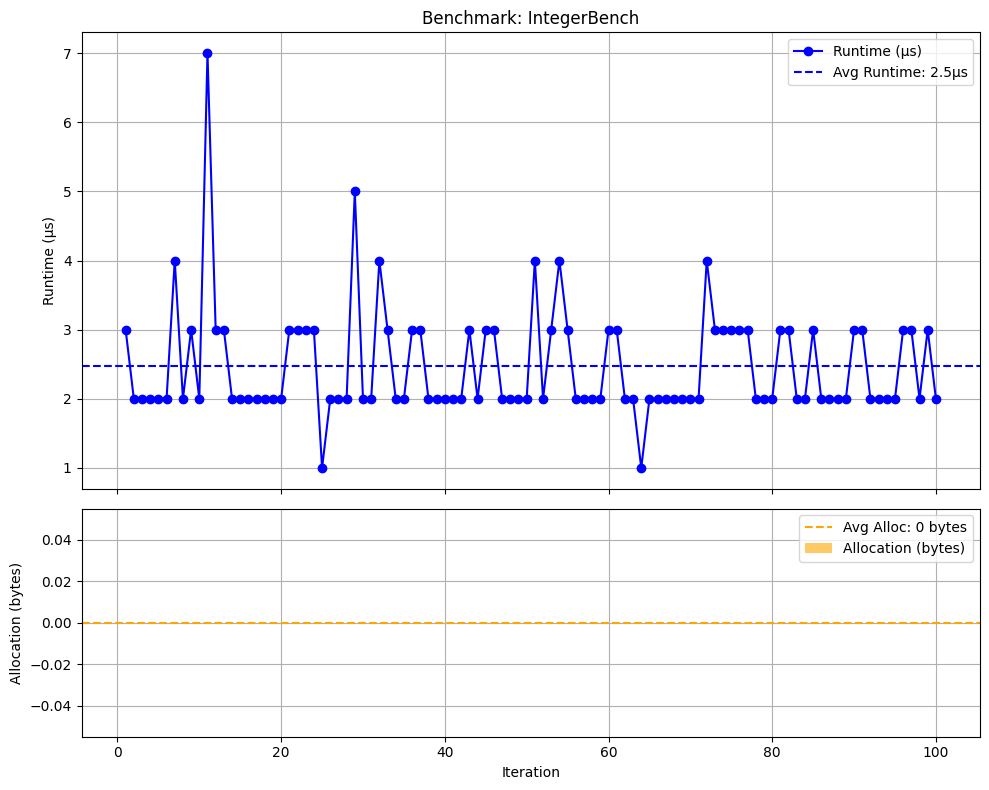

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [22, 10, 10, 9, 9, 9, 8, 9, 8, 8, 9, 9, 9, 9, 9, 8, 9, 8, 10, 9, 10, 9, 9, 9, 14, 9, 13, 8, 8, 13, 9, 9, 10, 13, 12, 10, 10, 9, 12, 10, 11, 9, 10, 8, 9, 10, 13, 10, 12, 9, 8, 12, 9, 9, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 10, 10, 9, 8, 9, 9, 8, 9, 9, 9, 13, 8, 9, 11, 13, 8, 9, 9, 9, 10, 9, 10, 9, 9, 9, 11, 13, 9, 9, 10, 13, 9], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


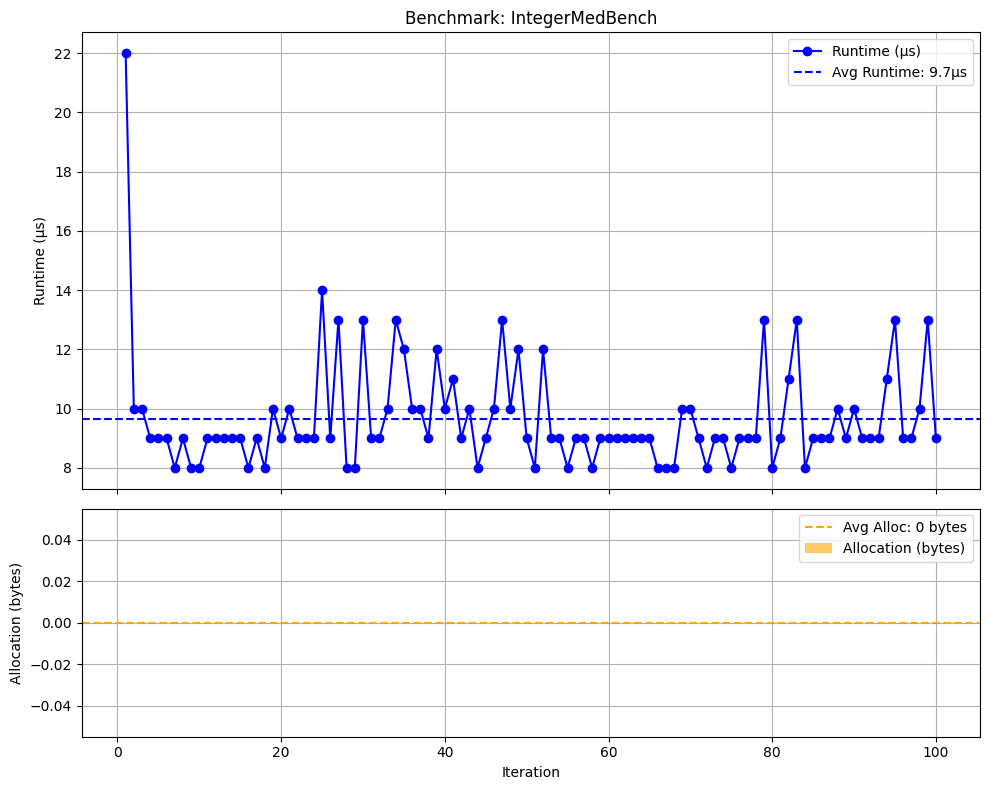

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [68, 67, 64, 61, 66, 61, 64, 69, 70, 68, 69, 64, 60, 72, 71, 61, 66, 61, 74, 64, 64, 75, 60, 63, 63, 72, 73, 66, 61, 61, 79, 67, 85, 61, 65, 64, 72, 61, 64, 96, 74, 64, 66, 64, 66, 64, 67, 66, 60, 61, 63, 65, 66, 71, 61, 68, 64, 61, 61, 66, 66, 62, 64, 73, 67, 64, 67, 66, 68, 61, 64, 61, 60, 62, 66, 75, 61, 66, 66, 61, 61, 60, 64, 64, 61, 65, 61, 61, 64, 74, 61, 65, 61, 62, 60, 64, 61, 60, 62, 62], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


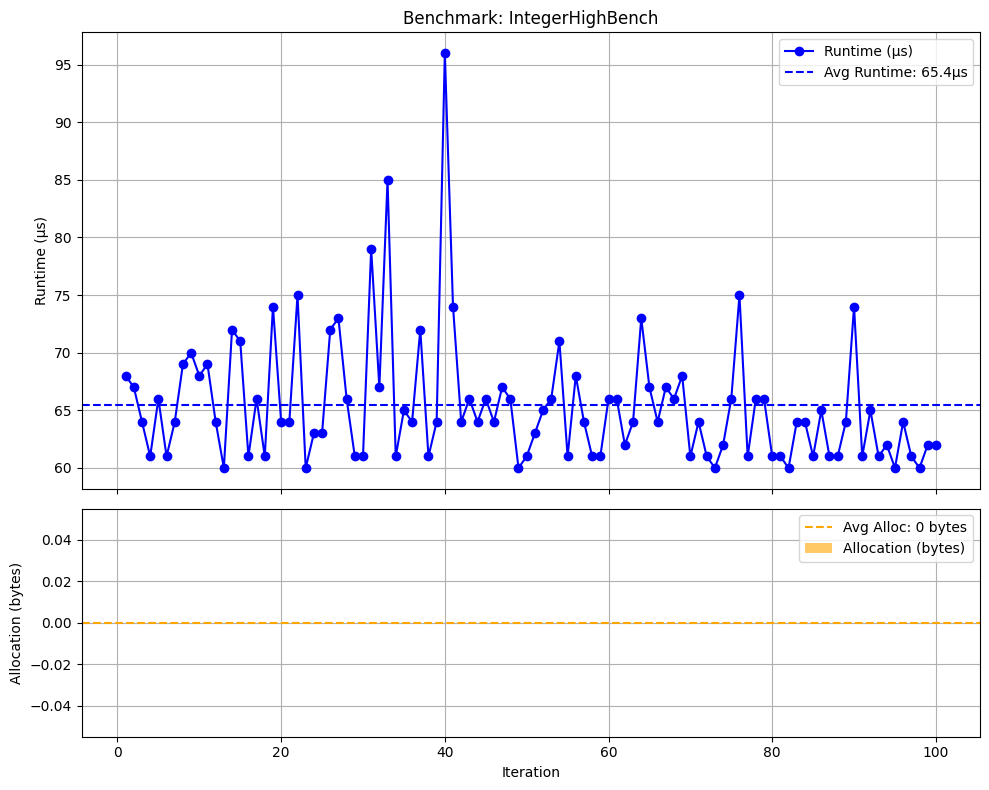

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [47, 38, 54, 37, 37, 37, 37, 46, 38, 38, 41, 37, 52, 36, 43, 38, 38, 38, 38, 39, 40, 38, 51, 38, 37, 44, 37, 38, 38, 38, 38, 44, 42, 37, 38, 37, 48, 42, 39, 37, 37, 39, 44, 37, 37, 46, 37, 45, 38, 39, 38, 43, 54, 43, 42, 41, 40, 37, 37, 44, 53, 39, 58, 40, 38, 38, 37, 38, 45, 38, 38, 37, 45, 43, 41, 45, 39, 43, 38, 37, 38, 38, 38, 37, 38, 37, 38, 37, 38, 38, 40, 37, 37, 124, 38, 38, 46, 37, 38, 37], Allocations: [69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69

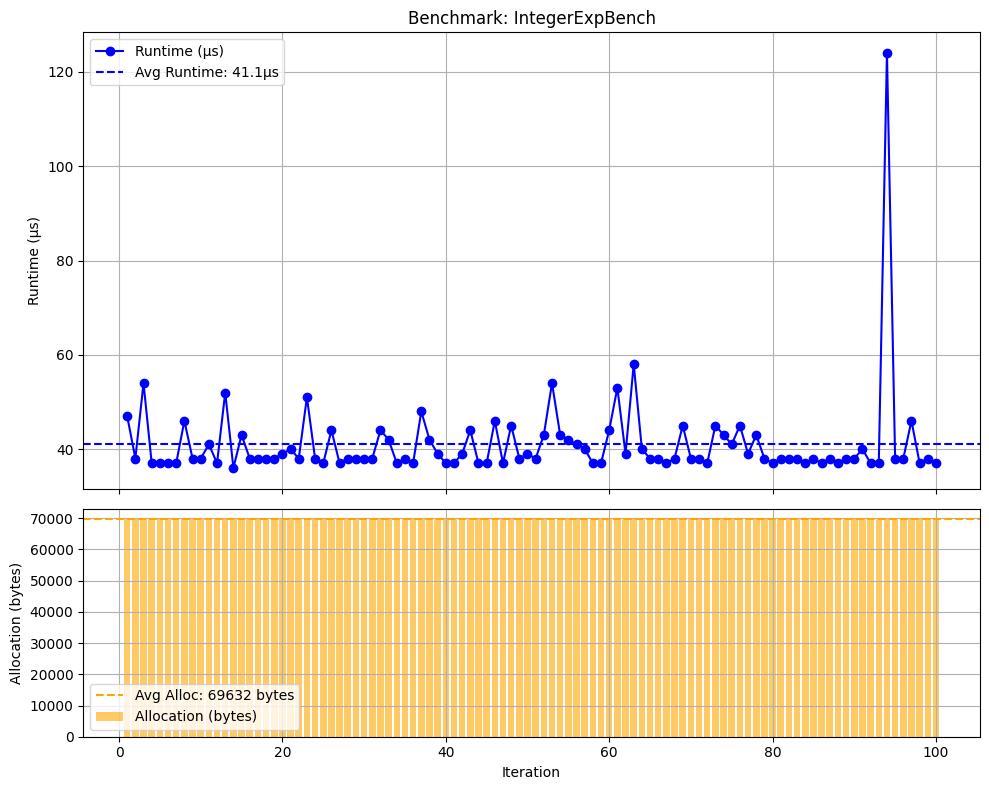

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [450, 456, 415, 414, 461, 458, 439, 458, 433, 456, 452, 427, 438, 461, 439, 427, 425, 472, 465, 461, 466, 421, 427, 437, 467, 454, 457, 427, 486, 436, 420, 430, 447, 420, 442, 438, 509, 409, 431, 442, 418, 660, 417, 464, 450, 436, 625, 417, 439, 475, 420, 439, 467, 416, 463, 444, 433, 413, 441, 446, 440, 457, 458, 427, 434, 427, 447, 434, 476, 452, 427, 443, 445, 514, 433, 436, 435, 448, 483, 429, 436, 429, 450, 481, 429, 417, 425, 473, 437, 563, 424, 424, 434, 456, 480, 495, 418, 483, 437, 458], Allocations: [475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475

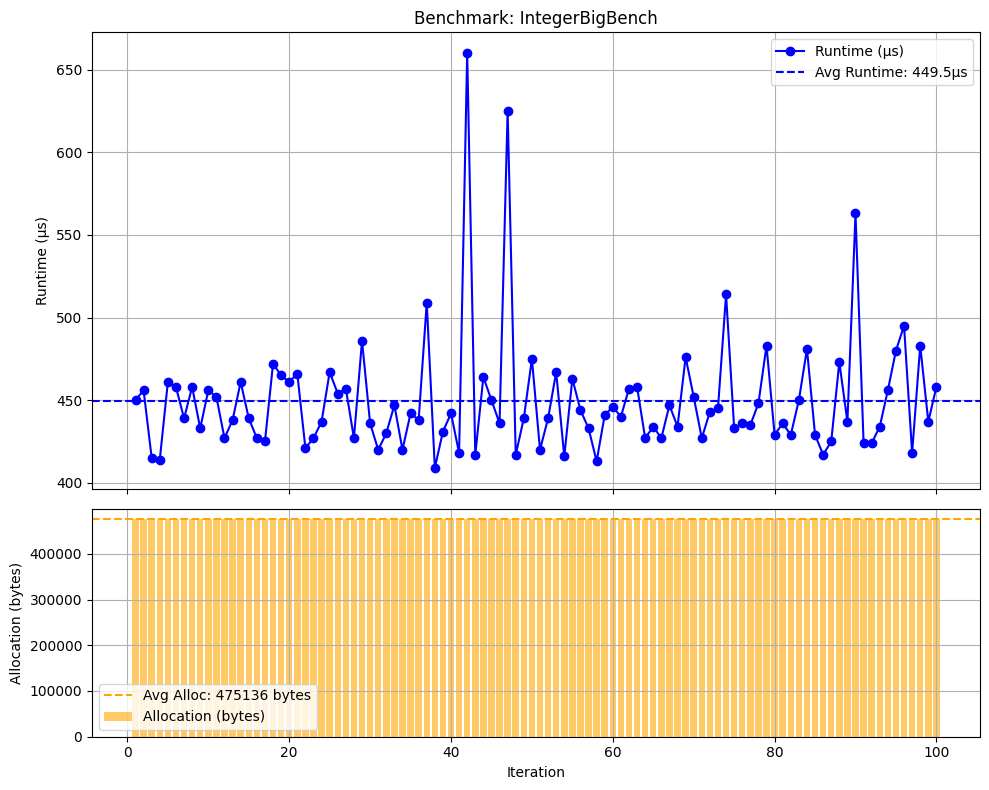

In [8]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])